In [5]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Parity check circuit

In [16]:
# sets target qubit to state 1 depending on parity score (odd/even number of 1s) in input
def parity_circuit(n=3):
    qc = QuantumCircuit(n+1)
    for qubit in range(n):
        qc.cx(qubit,n)
    print(qc.draw())
    return qc

In [31]:
def test_circuit(n=3, init_state='000'):
    qc_test = QuantumCircuit(n+1,1)
    
    # turn all indicated qubits to
    for q,s in enumerate(init_state):
        if s == '1': # 1 by x gate if s = 1
            qc_test.x(q)
        elif s == '2': # superposition by hadamard gate if s = 2
            qc_test.h(q)
    
    qc_parity = parity_circuit(n)
    qc_test.append(qc_parity, range(n+1))
    # measure last qubit
    qc_test.measure(n,0)
    return qc_test

In [46]:
n = 3
init_state='222'
qc_test = test_circuit(n, init_state)
qc_test.draw()

                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘


┌───┐┌──────────────┐   
q_0: ┤ H ├┤0             ├───
     ├───┤│              │   
q_1: ┤ H ├┤1             ├───
     ├───┤│  circuit-588 │   
q_2: ┤ H ├┤2             ├───
     └───┘│              │┌─┐
q_3: ─────┤3             ├┤M├
          └──────────────┘└╥┘
c: 1/══════════════════════╩═
                           0

## run parity counting experiment

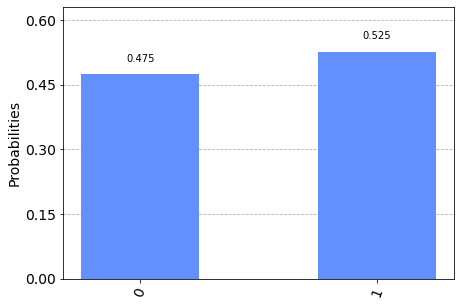

In [53]:
simulator = Aer.get_backend('qasm_simulator')
shots = 1000 # setting to 1 will give random result if init_state contains '2's
counts = execute(qc_test, backend=simulator, shots=shots).result().get_counts(qc_test)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [54]:
# process
import pandas as pd
answers = pd.DataFrame.from_dict(counts.items())
print("Results:\n",answers)

Results:
    0    1
0  0  475
1  1  525


In [55]:
counts

{'0': 475, '1': 525}